In [3]:
%matplotlib inline
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Código original

CPU times: user 3.21 s, sys: 0 ns, total: 3.21 s
Wall time: 3.18 s


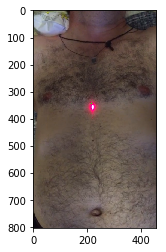

In [77]:
%%time

img = cv2.imread('input.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, r = img.shape

target_color = np.array((255, 0, 0), dtype=np.int)
best_y = -1
best_x = -1
best_distance = float('inf')

blur = cv2.GaussianBlur(img,(5,5),0)

def distance(x, y):
    return np.sum((x - y) ** 2)

for y in range(h):
    for x in range(w):
        d = distance(blur[y, x], target_color)
        if d < best_distance:
            best_distance = d
            best_x = x
            best_y = y            
            
plt.imshow(cv2.circle(img, (best_x, best_y), 2, (0, 255, 0), -1))

# Código novo

CPU times: user 42.8 ms, sys: 323 µs, total: 43.1 ms
Wall time: 41.8 ms


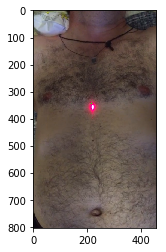

In [76]:
%%time

img = cv2.imread('input.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
target_color = np.array((255, 0, 0), dtype=np.int)
blur = cv2.GaussianBlur(img,(5,5),0)
dist = np.sum((blur-target_color) ** 2, axis=2)
ind = np.unravel_index(np.argmin(dist, axis=None), dist.shape)
            
plt.imshow(cv2.circle(img, (ind[1], ind[0]), 2, (0, 255, 0), -1))

In [75]:
cv2.imwrite('result.png', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

True